## Finpro Stage 1 - EDA - Credit Card Balance

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  1.4.4
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [4]:
# Load the data from the CSV file
data = pd.read_csv('credit_card_balance.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# 1. Descriptive Statistics

In [15]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 

In [16]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


## Pendekatan Numerik

In [17]:
#identifying Numerical and Categorical Features
nums = [
    'SK_ID_PREV',
    'SK_ID_CURR',
    'MONTHS_BALANCE',
    'AMT_BALANCE',
    'AMT_CREDIT_LIMIT_ACTUAL',
    'AMT_DRAWINGS_ATM_CURRENT',
    'AMT_DRAWINGS_CURRENT',
    'AMT_DRAWINGS_OTHER_CURRENT',
    'AMT_DRAWINGS_POS_CURRENT',
    'AMT_INST_MIN_REGULARITY',
    'AMT_PAYMENT_CURRENT',
    'AMT_PAYMENT_TOTAL_CURRENT',
    'AMT_RECEIVABLE_PRINCIPAL',
    'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_DRAWINGS_ATM_CURRENT',
    'CNT_DRAWINGS_CURRENT',
    'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT',
    'CNT_INSTALMENT_MATURE_CUM',
    'SK_DPD',
    'SK_DPD_DEF'
]

# Kolom kategorikal (berdasarkan tipe data object)
cats = [
    'NAME_CONTRACT_STATUS'
]

In [18]:
# Mengatur Pandas untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [19]:
data[nums].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

Overall kolomnya sesuai sih dengan isinya, untuk tipe data "AMT_CREDIT_LIMIT_ACTUAL" lebih bettr float sih dan "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_INSTALMENT_MATURE_CUM" dan "CNT_DRAWINGS_POS_CURRENT" better pake integer sih

### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [24]:
#Jumlah data yang null
data.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

Data yang memiliki nilai kosong ada pada AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT,  CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT dan CNT_DRAWINGS_POS_CURRENT

### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

AMT_BALANCE (Saldo Kredit):

Nilai minimum sebesar -420,250 menunjukkan saldo negatif. Biasanya, saldo kredit seharusnya tidak negatif, kecuali ada penyesuaian, pengembalian, atau kesalahan dalam pencatatan. Perlu dikonfirmasi apakah nilai negatif ini wajar dalam konteks bisnis Home Credit atau disebabkan oleh anomali data.
AMT_DRAWINGS_ATM_CURRENT (Jumlah Penarikan di ATM):

Nilai minimum sebesar -6,827.31 menunjukkan penarikan negatif, yang tidak logis karena penarikan di ATM seharusnya selalu bernilai positif (uang diambil dari ATM). Ini mungkin merupakan kesalahan data atau penyesuaian balik yang tidak umum dilakukan di ATM.
AMT_DRAWINGS_CURRENT (Total Penarikan):

Nilai minimum sebesar -6,211.62 juga menunjukkan penarikan negatif, yang tidak wajar. Sama seperti kasus ATM, penarikan seharusnya bernilai positif.
AMT_PAYMENT_CURRENT (Jumlah Pembayaran Bulanan) dan AMT_PAYMENT_TOTAL_CURRENT (Total Pembayaran Bulanan):

Meskipun nilai rata-ratanya wajar, ada nilai 0 untuk kuartil ke-25 dan nilai maksimum yang sangat besar (4,289,207 untuk AMT_PAYMENT_CURRENT dan 4,278,316 untuk AMT_PAYMENT_TOTAL_CURRENT). Pembayaran sebesar ini tampak sangat besar dan mungkin merupakan outlier yang perlu diperiksa, terutama jika jumlah pembayaran melebihi jumlah kredit.
SK_DPD (Jumlah Hari Tertunggak) dan SK_DPD_DEF:

Meskipun rata-rata keterlambatan pembayaran (SK_DPD) adalah 9,28 hari, nilai maksimum sebesar 3,260 hari (lebih dari 8 tahun) tampak tidak realistis untuk kredit yang masih berjalan. Hal ini bisa disebabkan oleh pencatatan yang tidak diperbarui atau kredit yang telah lama jatuh tempo tetapi belum dicatatkan selesai.
CNT_DRAWINGS_ATM_CURRENT (Jumlah Transaksi Penarikan di ATM):

Nilai rata-rata hanya 0.31 kali per bulan, tetapi ada pelanggan yang melakukan hingga 51 transaksi di ATM dalam satu bulan. Ini tampak tidak wajar, karena melakukan penarikan sebanyak itu dalam sebulan menunjukkan perilaku yang tidak biasa atau adanya pencatatan transaksi yang salah.
CNT_DRAWINGS_OTHER_CURRENT dan CNT_DRAWINGS_POS_CURRENT:

Nilai minimum dan maksimum untuk kolom ini menunjukkan bahwa beberapa pelanggan melakukan 0 transaksi selama periode tersebut, sementara ada pelanggan yang memiliki hingga 165 transaksi penarikan di POS dalam satu bulan. Jumlah yang begitu tinggi bisa menjadi tanda perilaku penggunaan yang tidak biasa, seperti adanya aktivitas yang mencurigakan atau anomali data.

# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

In [25]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_STATUS:
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64



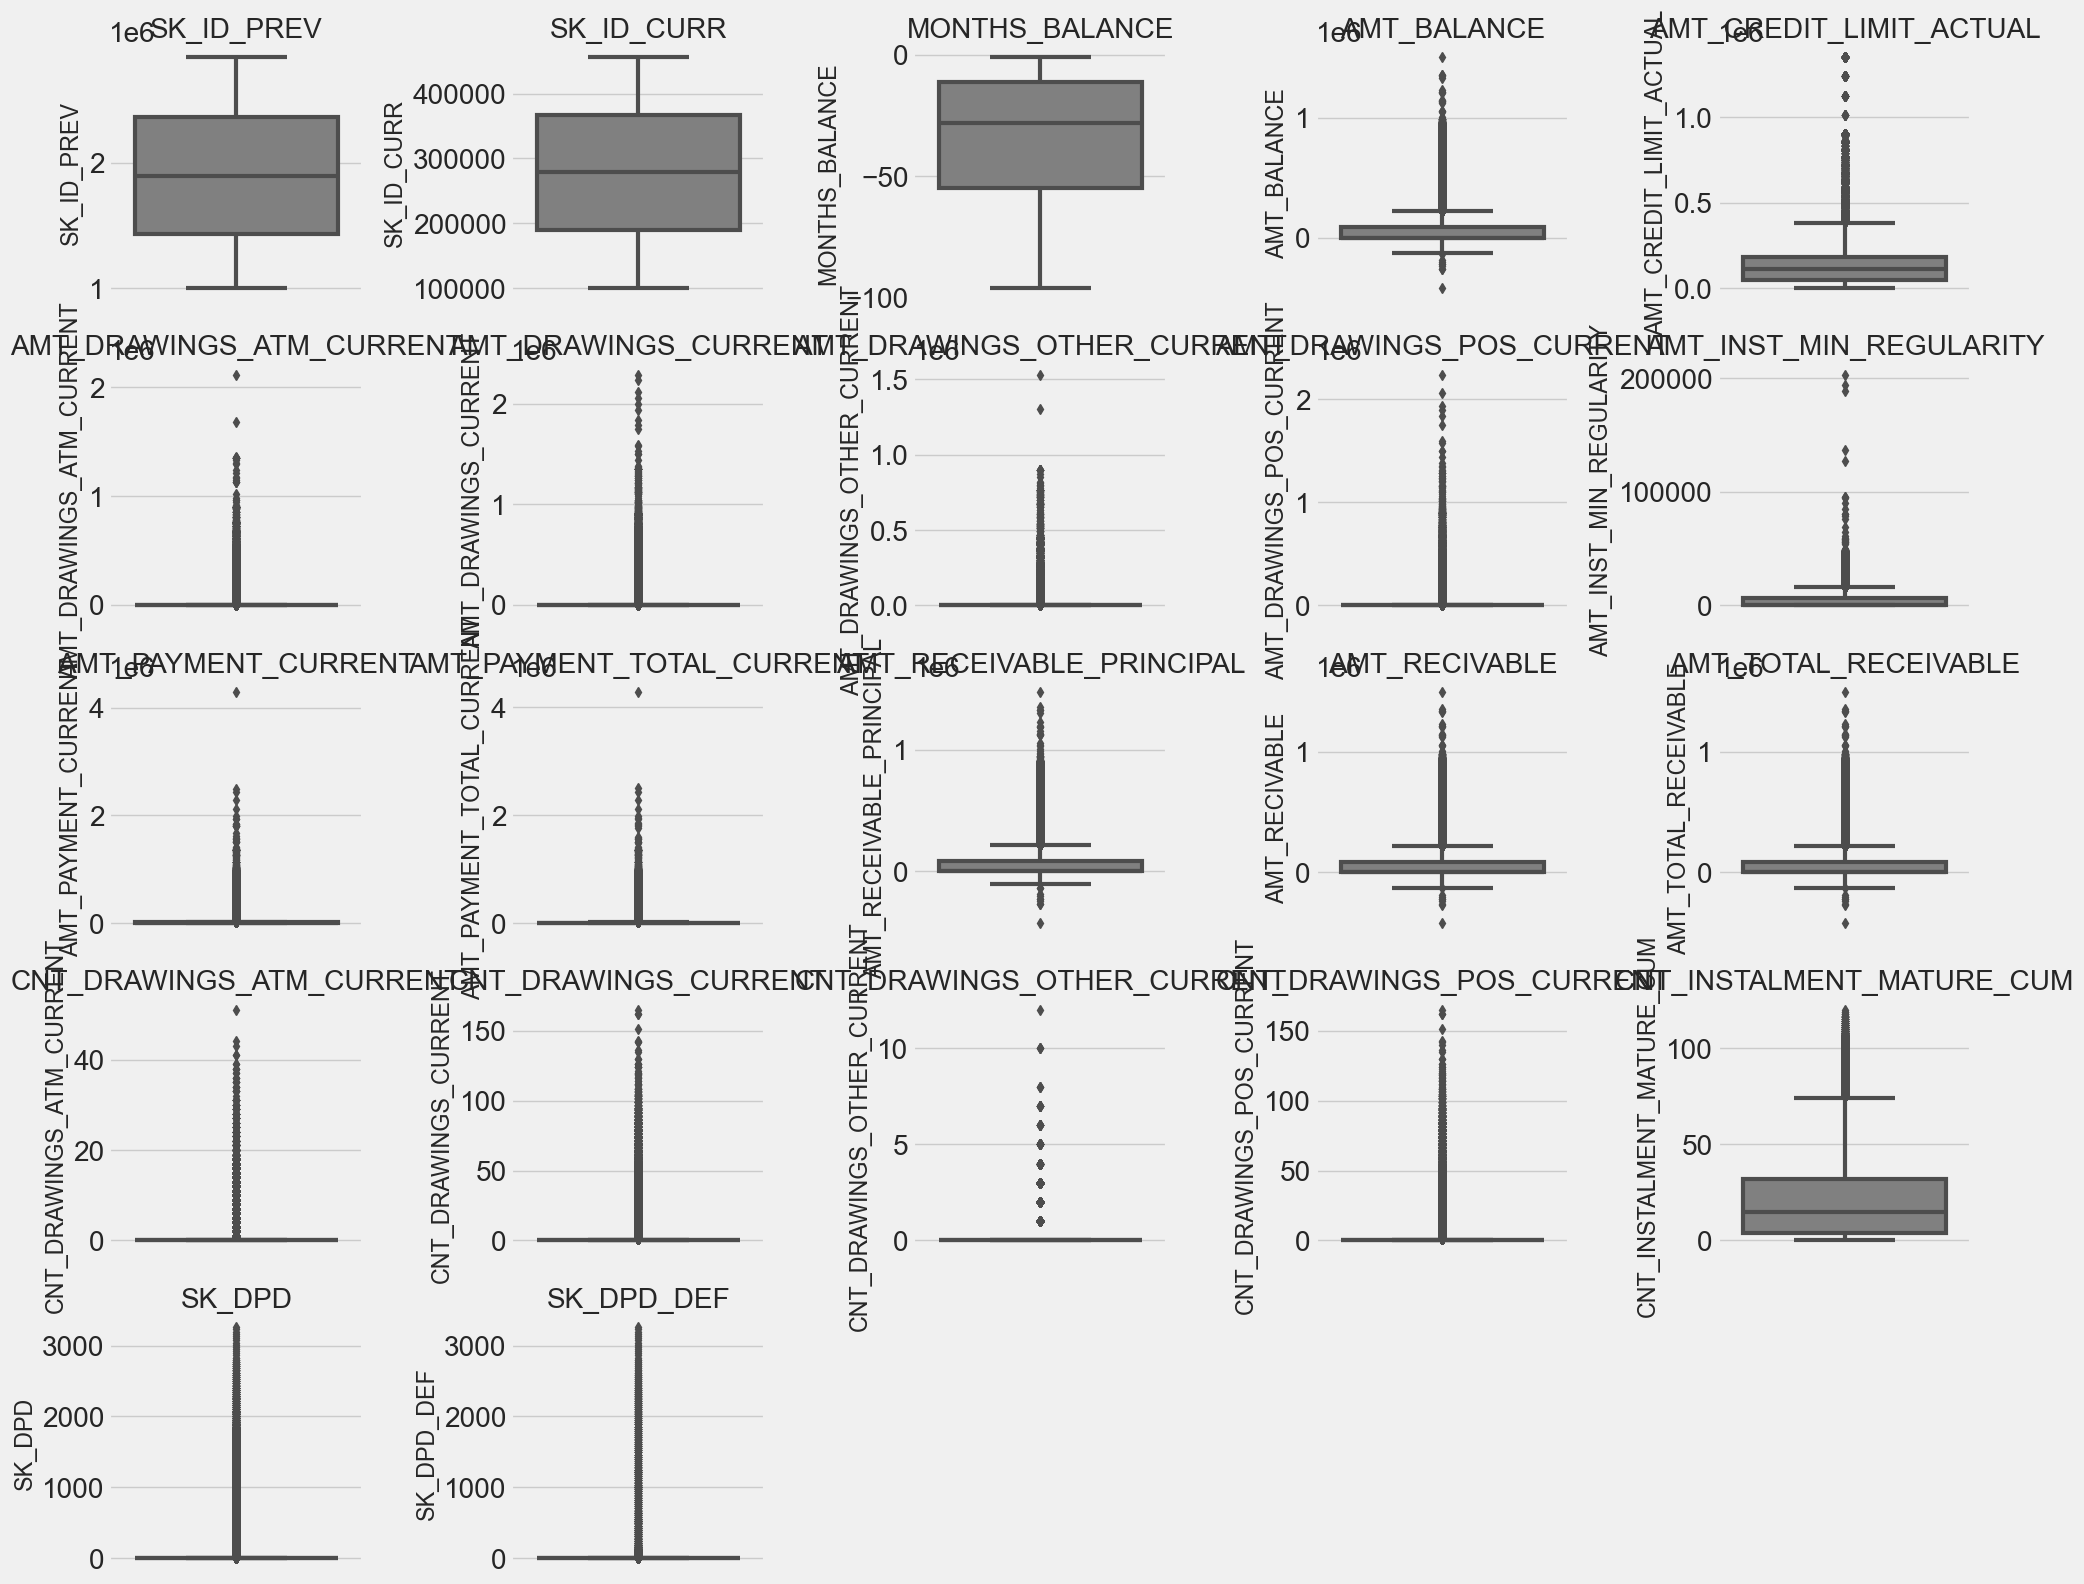

In [27]:
# Plot boxplot untuk setiap kolom dalam nums
plt.figure(figsize=(20, 16))

# Loop untuk menampilkan boxplot untuk setiap kolom
for i in range(len(nums)):
    plt.subplot(5, 5, i+1)  # Sesuaikan layout grid 5x5
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.title(nums[i])

# Berikan jarak antar plot
plt.tight_layout()
plt.show()

SK_ID_PREV dan SK_ID_CURR:<br>
Kolom ini menunjukkan distribusi ID unik, sehingga tidak memiliki makna distribusi seperti kolom numerik lainnya. Tidak ada hal yang perlu di-follow up terkait distribusi kolom ini karena hanya berfungsi sebagai identifikasi.<br>

MONTHS_BALANCE:<br>
Kolom Months Balance tidak memiliki outliers extreme terlihat nilai minimum atau terlama pada kolom ini adalah -100 yang mengindikasikan bahwa kolom ini memiliki months balance tertinggi yaitu 100 bulan yang lalu yang berarti data ini menampung data historical nasabah selama 100 bulan yang lalu.

CNT_INSTALMENT_MATURE_CUM:<br>
Sebagian besar data terpusat di nilai rendah, dengan median yang relatif kecil. Ini menunjukkan bahwa kebanyakan kredit sebelumnya memiliki jumlah cicilan yang sudah dibayar yang rendah. Terlihat adanya outliers signifikan. Ada beberapa pelanggan yang memiliki jumlah cicilan yang sudah dibayar jauh lebih tinggi dibandingkan dengan mayoritas data. Hal ini dapat menandakan bahwa ada beberapa kredit dengan tenor yang panjang atau pelanggan yang sudah membayar cicilan dalam jumlah besar.

AMT_RECIVABLAE:<br>
Kolom ini adalah kolom total utang yang masih belum dibayar sama pelanggan, terlihat disini memiliki distribusi rendah jadi hanya sedikit utang yang masih belum dibayar sama pelanggan, its a good thing buat mendalami lebih lanjut

AMT_CREDIT_LIMIT_ACTUAL:<br>
tuhkan bingung, ini tuh harusnya limit credit untuk pelanggaan yang berbasis kartu tapi kenapa integer coo, jadi pas di boxplot-in gini jadi gitu hasilnya, bagusnya pake float


**Rekomendasi Pre-Processing:** <br>

Lakukan analisis lebih lanjut pada outlier yang terdeteksi <br>
Normalisasi atau scaling pada kolom numerik yang distribusinya skewed.<br>
Pertimbangkan untuk menggunakan transformasi seperti log-transform jika distribusi terlalu skewed, untuk menormalkan distribusi.<br>

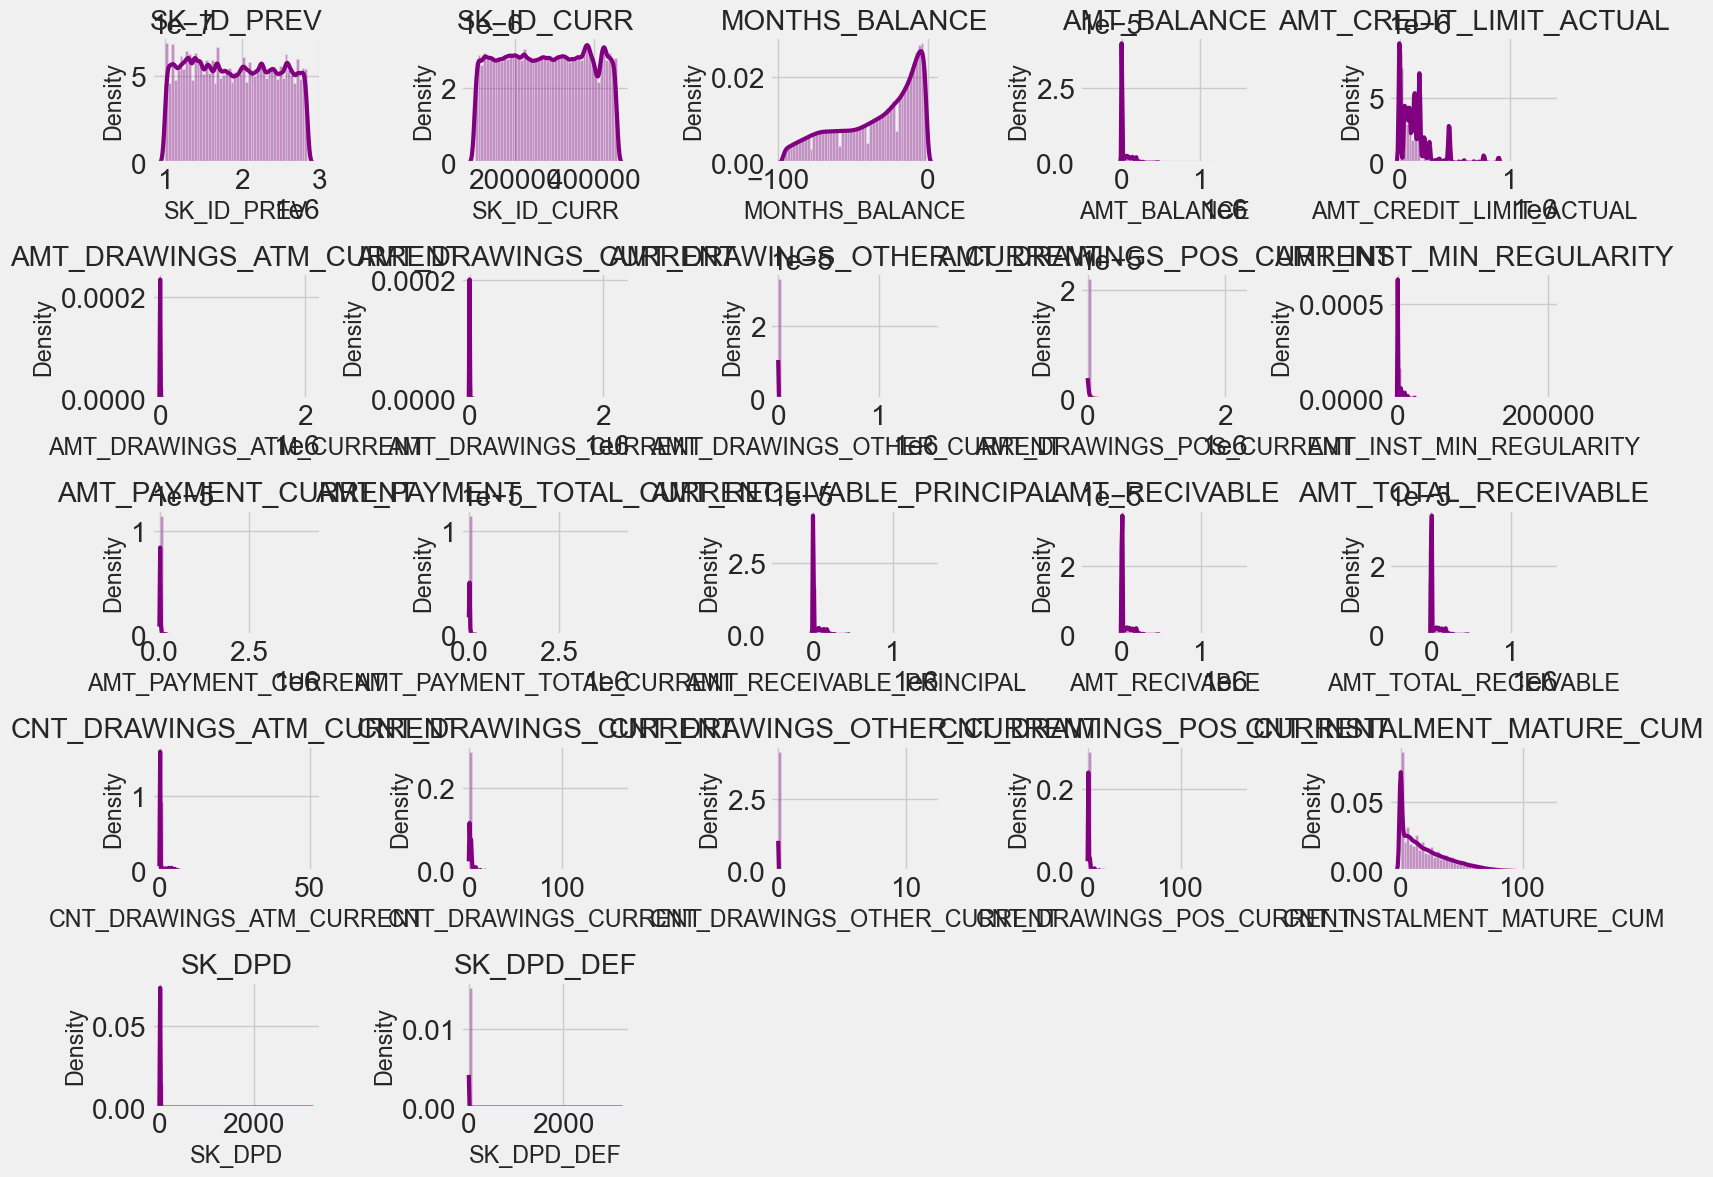

In [29]:
# Plot distribusi (distplot diganti dengan histplot dengan kde)
plt.figure(figsize=(16, 12))

# Loop untuk membuat distribusi plot untuk setiap kolom dalam nums
for i in range(len(nums)):
    plt.subplot(5, 5, i+1)  # Sesuaikan layout grid 5x5
    sns.distplot(data[nums[i]], kde=True, color='purple')
    plt.title(nums[i])

# Berikan jarak antar plot
plt.tight_layout()

Berdasarkan visualisasi density plot dari gambar di atas, berikut adalah analisis distribusi masing-masing kolom:<br>

SK_ID_PREV dan SK_ID_CURR:<br>
Distribusi ID pada kedua kolom ini cenderung merata (flat) yang menunjukkan bahwa masing-masing ID memiliki frekuensi yang hampir sama.<br>
Tidak ada yang perlu di-follow up lebih lanjut pada kolom ini karena bersifat sebagai identifier.<br>

MONTHS_BALANCE: <br>
Dari distribusi kolom ini tampaknya lebih banyak distribusi pada 0 menunjukkan bahwa banyak pelanggan memiliki kredit saat ini yang baru saja dimulai atau belum ada bulan yang terlewati sejak aplikasi. 

CREDIT_LIMIT_ACTUAL <br>

Dari distribusi AMT_CREDIT_LIMIT_ACTUAL dapat dilihat bahwa distribusi banyak yang 0, ini mungkin terjadi outlier yang akan ditelusuri lebih dalam kedepannya.

CNT_INSTALMENT_MATURE_CUM: <br>
ini adlah kolom berapa banyak cicilan yang sudah dilunasi, dan disini lebih condong ke 0 yang bearrti banyak pelangga  yang belum membayar cicilan.

## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




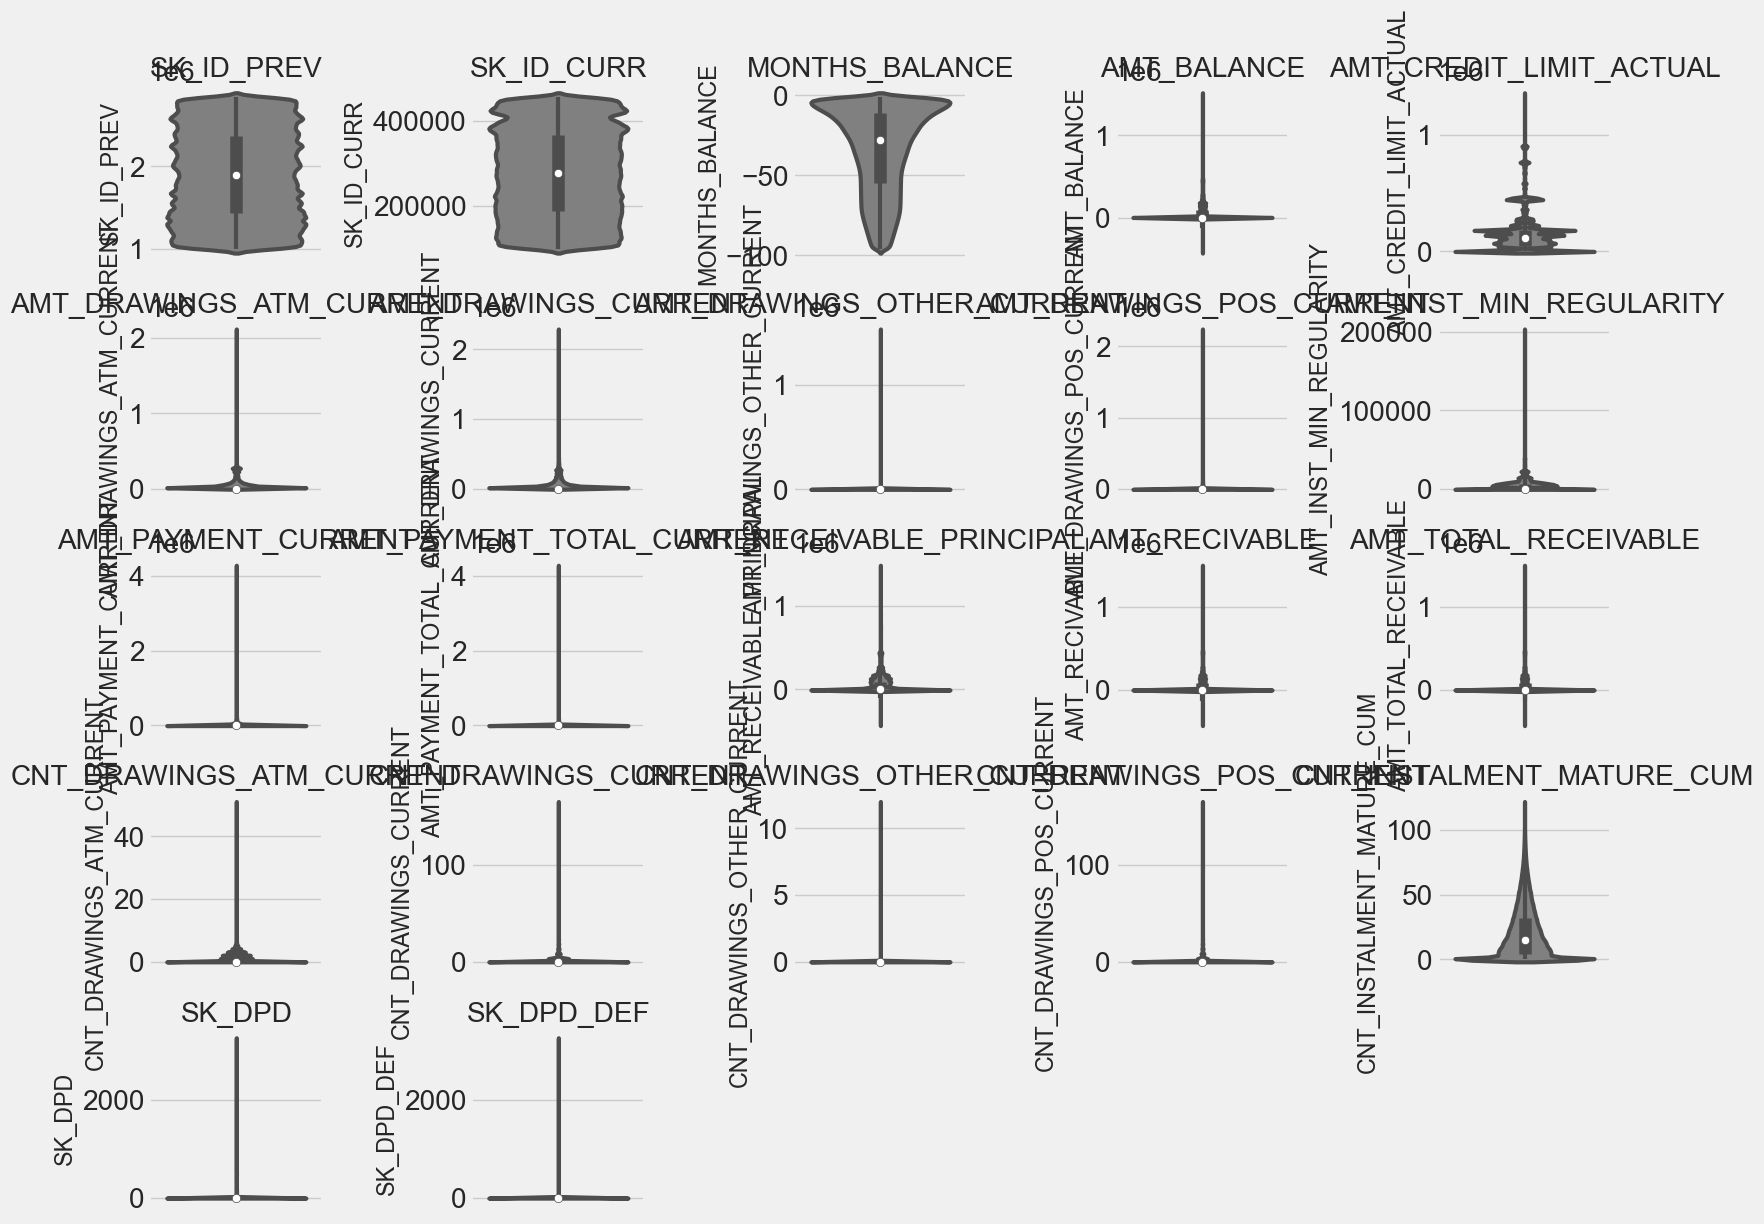

In [32]:
# Plot violin plot untuk setiap kolom dalam nums
plt.figure(figsize=(16, 12))

# Loop untuk menampilkan violin plot untuk setiap kolom
for i in range(len(nums)):
    plt.subplot(5, 5, i+1)  # Sesuaikan layout grid 5x5
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.title(nums[i])

# Berikan jarak antar plot
plt.tight_layout()
plt.show()


Dari violin plot yang ditampilkan di atas, berikut adalah beberapa observasi terkait distribusi data untuk tiap kolom:

SK_ID_PREV dan SK_ID_CURR:

Terlihat distribusi merata di seluruh nilai, namun nilai SK_ID merupakan identifikasi unik sehingga hanya relevan sebagai pengenal, bukan distribusi yang perlu dianalisis lebih lanjut.
MONTHS_BALANCE:

Distribusi cukup simetris dengan puncak di sekitar nilai yang lebih rendah (sekitar -40 hingga 0), menunjukkan bahwa mayoritas data berada di kisaran waktu tertentu dalam bulan terakhir, kemungkinan merepresentasikan waktu penggunaan saldo.
Kolom seperti AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, dll:

Sebagian besar distribusinya terkonsentrasi pada satu nilai rendah atau nol. Hampir seluruh data tampaknya terakumulasi pada batas bawah, menunjukkan bahwa hanya sebagian kecil transaksi atau limit kredit yang digunakan secara signifikan.
CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_POS_CURRENT:

Pola distribusi menunjukkan sebagian besar transaksi atau penarikan di ATM maupun POS terjadi dalam jumlah yang sangat rendah, dengan beberapa nilai ekstrim yang jauh lebih tinggi, terlihat dari ekor distribusi yang memanjang.
CNT_INSTALMENT_MATURE_CUM:

Terlihat lebih jelas distribusi yang lebih menyebar dengan adanya beberapa kelompok yang signifikan di sekitar nilai yang lebih rendah, tetapi ada beberapa data yang berada pada ekor atas, menunjukkan adanya sebagian kecil klien dengan cicilan yang sudah jatuh tempo lebih tinggi.
SK_DPD dan SK_DPD_DEF:

Sebagian besar nilai distribusi berkonsentrasi pada nol, menunjukkan bahwa mayoritas pengguna tidak memiliki keterlambatan pembayaran (days past due). Namun, terdapat beberapa nilai ekstrim, mengindikasikan sejumlah pengguna mengalami keterlambatan pembayaran signifikan.

## Kesimpulan Univariate Analysis<br>

1. Distribusi Data yang Sangat Skewed (Miring ke Kanan)
Sebagian besar variabel menunjukkan distribusi positively skewed, yang terlihat jelas dari boxplot, violin plot, dan density plot. Banyak variabel seperti AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, CNT_DRAWINGS_ATM_CURRENT, SK_DPD, dan SK_DPD_DEF menunjukkan mayoritas nilai berada di dekat nol, dengan beberapa outliers yang cukup besar.
Ini menunjukkan bahwa mayoritas pelanggan memiliki saldo rendah, kredit rendah, atau aktivitas penarikan rendah, namun ada sebagian kecil dengan nilai yang sangat tinggi yang menciptakan ekor panjang di sisi kanan distribusi.
2. Outliers (Nilai Ekstrem) yang Signifikan
Dari boxplot, terlihat ada outliers yang sangat signifikan di hampir semua variabel moneter seperti AMT_CREDIT_LIMIT_ACTUAL, AMT_PAYMENT_TOTAL_CURRENT, dan CNT_DRAWINGS_POS_CURRENT. Outliers ini menunjukkan bahwa beberapa pelanggan memiliki nilai transaksi atau saldo yang sangat tinggi dibandingkan dengan mayoritas lainnya.
Ini perlu diperhatikan saat melakukan analisis lebih lanjut karena dapat mempengaruhi perhitungan seperti rata-rata atau regresi yang sensitif terhadap outliers.
3. Kebanyakan Pelanggan Tidak Memiliki Aktivitas yang Tinggi
Dari density plot, sebagian besar nilai variabel seperti CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_POS_CURRENT, SK_DPD, dan SK_DPD_DEF berkumpul di nilai nol. Ini menunjukkan bahwa banyak pelanggan yang tidak melakukan aktivitas penarikan atau transaksi yang signifikan, dan sebagian besar juga tidak memiliki keterlambatan pembayaran.
Dalam hal keterlambatan pembayaran (SK_DPD dan SK_DPD_DEF), sebagian besar pelanggan tidak mengalami keterlambatan atau default, namun ada segelintir yang mengalami keterlambatan yang besar, menciptakan distribusi yang sangat skewed.
4. MONTHS_BALANCE Memiliki Distribusi yang Unik
MONTHS_BALANCE adalah salah satu variabel yang tidak menunjukkan skewness yang kuat dibandingkan variabel lain. Distribusinya lebih bervariasi, dengan puncak distribusi di sekitar nol dan ekor panjang ke arah negatif, yang mungkin merefleksikan data historis terkait saldo yang lebih sering terjadi di masa lalu.
Violin plot dari MONTHS_BALANCE menunjukkan bahwa mayoritas nilai berada di sekitar nol, tetapi masih ada variasi yang signifikan dalam data.
5. Distribusi Variabel Numerik Lainnya
Violin plot memberikan informasi tambahan mengenai kepadatan data di sekitar median. Dalam beberapa variabel seperti CNT_INSTALMENT_MATURE_CUM, ada variasi yang lebih besar dalam distribusi, meskipun skewed, distribusi ini lebih lebar dan bervariasi.
Pada variabel seperti AMT_RECEIVABLE_PRINCIPAL atau CNT_DRAWINGS_ATM_CURRENT, ada sedikit variasi dalam jumlah besar karena sebagian besar pelanggan memiliki nilai yang mendekati nol

# 3. Multivariate Analysis (10 Poin)

In [33]:
data[nums].corr()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,0.004723,0.003670,0.005046,0.006631,0.004342,0.002624,-0.000160,0.001721,0.006460,0.003472,0.001641,0.005140,0.005035,0.005032,0.002821,0.000367,-0.001412,0.000809,-0.007219,-0.001786,0.001973
SK_ID_CURR,0.004723,1.000000,0.001696,0.003510,0.005991,0.000814,0.000708,0.000958,-0.000786,0.003300,0.000127,0.000784,0.003589,0.003518,0.003524,0.002082,0.002654,-0.000131,0.002135,-0.000581,-0.000962,0.001519
MONTHS_BALANCE,0.003670,0.001696,1.000000,0.014558,0.199900,0.036802,0.065527,0.000405,0.118146,-0.087529,0.076355,0.035614,0.016266,0.013172,0.013084,0.002536,0.113321,-0.026192,0.160207,-0.008620,0.039434,0.001659
AMT_BALANCE,0.005046,0.003510,0.014558,1.000000,0.489386,0.283551,0.336965,0.065366,0.169449,0.896728,0.143934,0.151349,0.999720,0.999917,0.999897,0.309968,0.259184,0.046563,0.155553,0.005009,-0.046988,0.013009
AMT_CREDIT_LIMIT_ACTUAL,0.006631,0.005991,0.199900,0.489386,1.000000,0.247219,0.263093,0.050579,0.234976,0.467620,0.308294,0.226570,0.490445,0.488641,0.488598,0.221808,0.204237,0.030051,0.202868,-0.157269,-0.038791,-0.002236
AMT_DRAWINGS_ATM_CURRENT,0.004342,0.000814,0.036802,0.283551,0.247219,1.000000,0.800190,0.017899,0.078971,0.094824,0.189075,0.159186,0.280402,0.278290,0.278260,0.732907,0.298173,0.013254,0.076083,-0.103721,-0.022044,-0.003360
AMT_DRAWINGS_CURRENT,0.002624,0.000708,0.065527,0.336965,0.263093,0.800190,1.000000,0.236297,0.615591,0.124469,0.337343,0.305726,0.337117,0.332831,0.332796,0.594361,0.523016,0.140032,0.359001,-0.093491,-0.020606,-0.003137
AMT_DRAWINGS_OTHER_CURRENT,-0.000160,0.000958,0.000405,0.065366,0.050579,0.017899,0.236297,1.000000,0.007382,0.002158,0.034577,0.025123,0.066108,0.064929,0.064923,0.012008,0.021271,0.575295,0.004458,-0.023013,-0.003693,-0.000568
AMT_DRAWINGS_POS_CURRENT,0.001721,-0.000786,0.118146,0.169449,0.234976,0.078971,0.615591,0.007382,1.000000,0.063562,0.321055,0.301760,0.173745,0.168974,0.168950,0.072658,0.520123,0.007620,0.542556,-0.106813,-0.015040,-0.002384
AMT_INST_MIN_REGULARITY,0.006460,0.003300,-0.087529,0.896728,0.467620,0.094824,0.124469,0.002158,0.063562,1.000000,0.333909,0.335201,0.896030,0.897617,0.897587,0.170616,0.148262,0.014360,0.086729,0.064320,-0.061484,-0.005715


<AxesSubplot:>

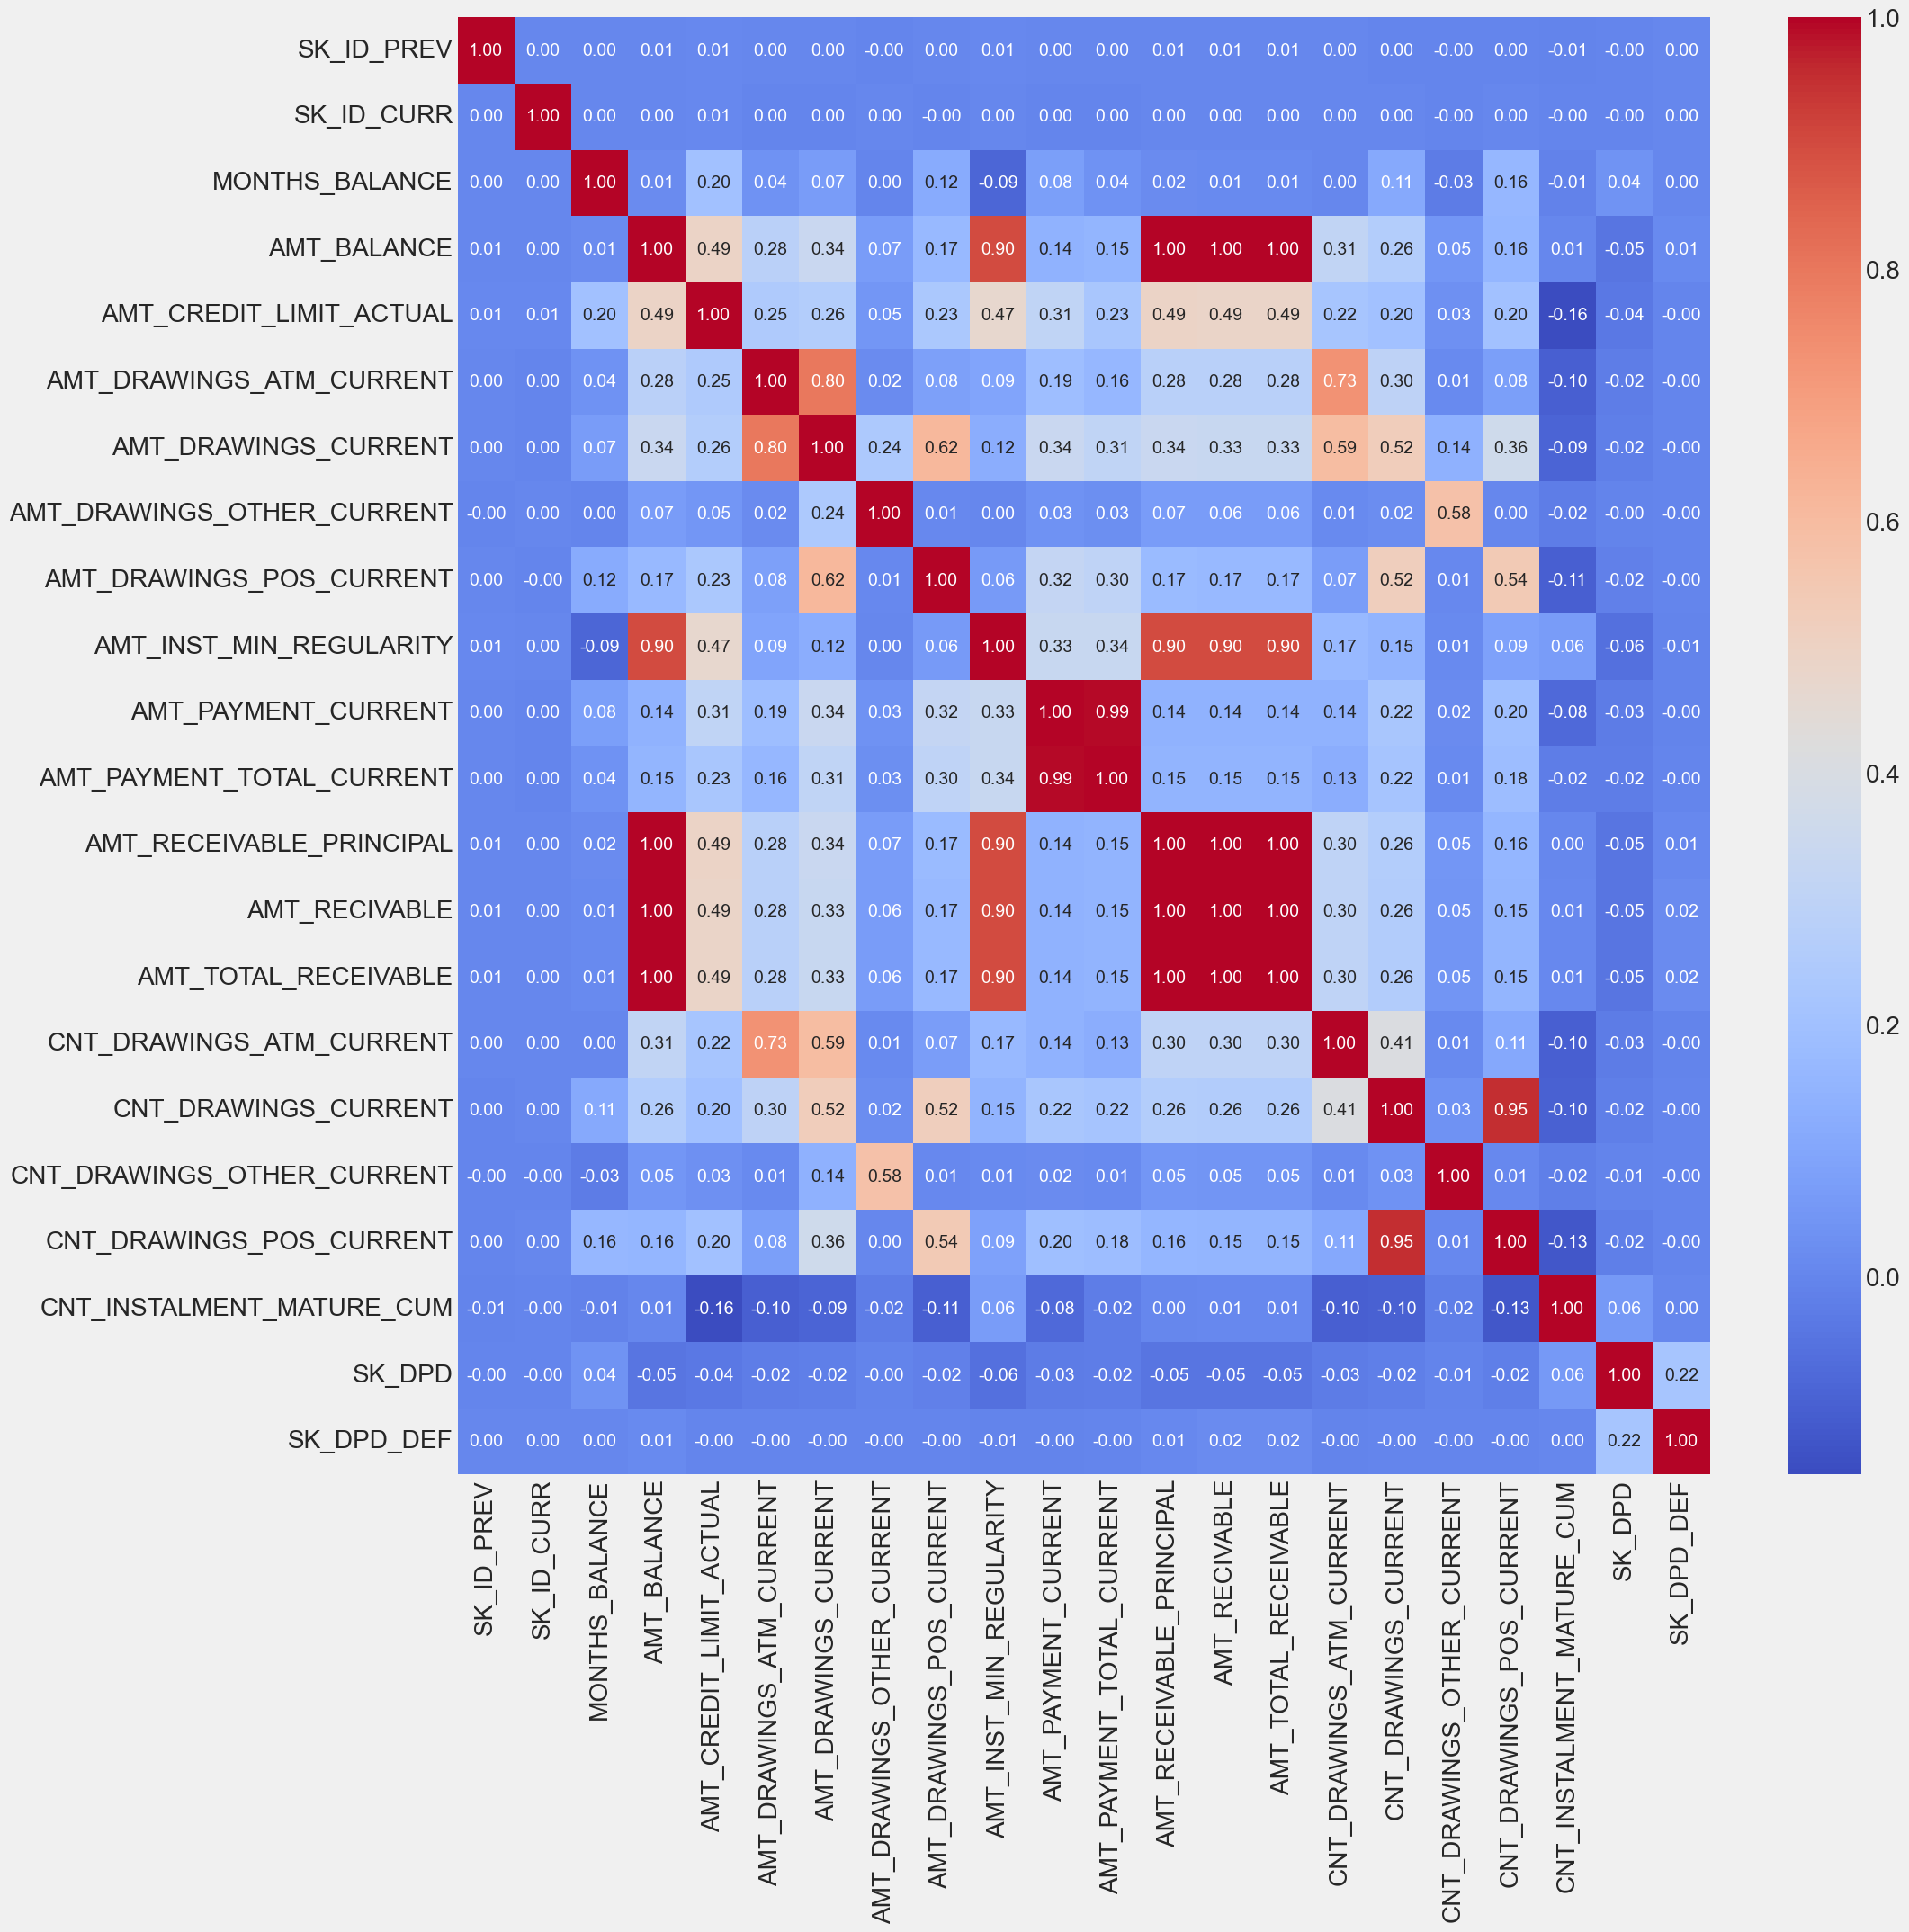

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')


# 3A Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
## Korelasi yang Signifikan:<br>
AMT_DRAWINGS_CURRENT dengan AMT_PAYMENT_CURRENT (0.95)

Korelasi yang sangat kuat antara jumlah penarikan saat ini dengan jumlah pembayaran saat ini. Ini menunjukkan bahwa semakin besar jumlah penarikan, semakin besar pula pembayaran yang dilakukan.
AMT_DRAWINGS_OTHER_CURRENT dengan CNT_DRAWINGS_OTHER_CURRENT (0.58)

Korelasi moderat antara jumlah penarikan kategori lain saat ini dengan jumlah transaksinya. Hal ini menunjukkan hubungan bahwa peningkatan jumlah penarikan ini cenderung beriringan dengan frekuensi penarikannya.
AMT_RECEIVABLE_PRINCIPAL dengan AMT_TOTAL_RECEIVABLE (1.00)

Hubungan yang sempurna (1.00) antara nilai pokok yang diterima dan total nilai yang harus diterima. Ini logis, karena pokok biasanya merupakan komponen utama dari total jumlah penerimaan.
SK_DPD_DEF dengan SK_DPD_DEF (1.00)

Ini adalah korelasi fitur dengan dirinya sendiri, yang selalu 1.0, karena setiap fitur secara sempurna berkorelasi dengan dirinya sendiri. penting dalam analisis pembayaran.<br>

## Fitur dengan Korelasi Rendah:<br>

SK_ID_CURR dengan sebagian besar fitur (korelasi mendekati 0)

ID pelanggan saat ini (SK_ID_CURR) tidak menunjukkan hubungan kuat dengan sebagian besar fitur lain, karena merupakan pengenal yang bersifat kategorikal dan bukan fitur numerik terkait perilaku kredit.
AMT_CREDIT_LIMIT_ACTUAL dengan SK_DPD_DEF (0.00)

Tidak ada hubungan antara batas kredit aktual dan status keterlambatan pembayaran (Days Past Due). Ini menunjukkan bahwa keterlambatan pembayaran tidak berkaitan langsung dengan batas kredit pelanggan.
MONTHS_BALANCE dengan CNT_DRAWINGS_ATM_CURRENT (0.00)

Tidak ada hubungan signifikan antara lama waktu sejak pembukaan akun dengan jumlah penarikan di ATM saat ini.


## Kesimpulan:<br>
Fitur yang paling relevan dan harus **dipertahankan** untuk analisis lebih lanjut adalah:<br>
1. AMT_DRAWINGS_CURRENT
Alasan: Memiliki korelasi sangat tinggi dengan AMT_PAYMENT_CURRENT (0.95). Karena jumlah penarikan mencerminkan aktivitas pengguna, dan korelasi yang kuat dengan pembayaran, ini adalah fitur penting untuk menggambarkan perilaku finansial pengguna. Fitur ini bisa merepresentasikan transaksi kartu kredit atau penggunaan dana<br>
2. AMT_CREDIT_LIMIT_ACTUAL
Alasan: Meskipun memiliki korelasi moderat dengan beberapa fitur, seperti AMT_BALANCE (0.47), batas kredit aktual penting untuk menggambarkan seberapa besar dana yang tersedia bagi pelanggan. Ini penting dalam memprediksi perilaku kredit dan risiko keterlambatan pembayaran.<br>
3. AMT_TOTAL_RECEIVABLE
Alasan: Korelasi yang sempurna dengan AMT_RECEIVABLE_PRINCIPAL (1.00) menunjukkan bahwa salah satu dari kedua fitur ini dapat dipilih, dan AMT_TOTAL_RECEIVABLE mungkin lebih komprehensif karena mencakup jumlah total yang harus diterima, bukan hanya nilai pokok.<br>
4. CNT_DRAWINGS_OTHER_CURRENT
Alasan: Korelasi moderat dengan AMT_DRAWINGS_OTHER_CURRENT (0.58). Ini memberikan informasi mengenai frekuensi penarikan yang dapat menjadi indikator kebiasaan transaksi pelanggan.

Fitur yang dapat dipertimbangkan untuk **diabaikan** dalam analisis prediktif (tetapi mungkin penting untuk identifikasi unik):<br>
**SK_ID_PREV** dan **SK_ID_CURR** (karena korelasinya rendah dan hanya penting untuk keperluan identifikasi).<br>





# 3B Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
<br>
Dari heatmap korelasi yang telah disediakan, berikut adalah analisis lebih lanjut mengenai korelasi antar-feature dan tindakan yang mungkin perlu diambil terhadap fitur-fitur tersebut.<br>

## Pola yang Menarik dari Korelasi:
Korelasi Tinggi antar Fitur Sejenis:

- AMT_DRAWINGS_CURRENT dan AMT_PAYMENT_CURRENT (0.95): Korelasi yang sangat kuat antara penarikan dan pembayaran menunjukkan bahwa pengguna yang melakukan penarikan lebih tinggi, juga melakukan pembayaran lebih tinggi.
Tindakan: Mungkin mempertahankan kedua fitur ini, karena mereka menggambarkan aspek yang berbeda dari perilaku keuangan (penarikan vs pembayaran). Namun, bisa dipertimbangkan untuk mengurangi kompleksitas dengan menggabungkan atau mengelompokkan fitur serupa dalam analisis lanjutan.
Korelasi Tinggi antar Fitur Terkait Kredit:

- AMT_RECEIVABLE_PRINCIPAL dan AMT_TOTAL_RECEIVABLE (1.00): Kedua fitur ini menunjukkan korelasi sempurna, yang berarti bahwa nilai pokok penerimaan sepenuhnya menentukan total penerimaan.
Tindakan: Salah satu dari fitur ini bisa dihapus tanpa kehilangan informasi. Pilih fitur yang lebih relevan dengan tujuan analisis, misalnya AMT_TOTAL_RECEIVABLE mungkin lebih berguna karena mencakup komponen total, bukan hanya pokok.
Korelasi Fitur ATM, POS, dan Lainnya:

- AMT_DRAWINGS_ATM_CURRENT dan AMT_DRAWINGS_CURRENT (0.60): Ada korelasi yang signifikan antara penarikan melalui ATM dengan total penarikan. Ini menunjukkan bahwa ATM merupakan komponen utama dari total penarikan.
AMT_DRAWINGS_POS_CURRENT dan CNT_DRAWINGS_POS_CURRENT (0.55): Korelasi moderat antara jumlah penarikan POS dengan frekuensi transaksi di POS.
Tindakan: Karena ATM dan POS hanya merupakan bagian dari total penarikan, kita dapat mempertahankan total penarikan AMT_DRAWINGS_CURRENT dan mungkin mengeliminasi fitur individual seperti AMT_DRAWINGS_ATM_CURRENT atau AMT_DRAWINGS_POS_CURRENT untuk menyederhanakan model.
Fitur yang Tidak Berkorelasi (Korelasi Rendah):

- SK_ID_CURR dan sebagian besar fitur lainnya memiliki korelasi mendekati nol, yang logis karena ID adalah pengenal kategorikal.
AMT_INST_MIN_REGULARITY menunjukkan korelasi rendah dengan semua fitur lainnya, termasuk pembayaran dan penarikan (korelasi tertinggi hanya 0.28 dengan AMT_PAYMENT_TOTAL_CURRENT).
Tindakan: SK_ID_CURR dan SK_ID_PREV bisa dihapus dari analisis karena tidak relevan secara numerik untuk model prediktif. AMT_INST_MIN_REGULARITY juga bisa dipertimbangkan untuk dihapus jika terbukti tidak memberikan kontribusi signifikan terhadap prediksi.
Tidak Ada Hubungan Langsung antara Keterlambatan Pembayaran (DPD) dan Batas Kredit:

- SK_DPD_DEF dan AMT_CREDIT_LIMIT_ACTUAL menunjukkan korelasi yang sangat rendah (0.00). Ini menunjukkan bahwa batas kredit tidak memiliki pengaruh langsung terhadap keterlambatan pembayaran.
Tindakan: Meskipun korelasinya rendah, SK_DPD_DEF tetap penting karena keterlambatan pembayaran adalah faktor utama dalam risiko kredit. Namun, mungkin faktor-faktor lain yang tidak ada di dataset ini lebih relevan dalam menjelaskan keterlambatan pembayaran. Batas kredit mungkin bisa dihilangkan, atau dicari korelasi dengan variabel lain.
Korelasi Antara Fitur Penarikan dan Frekuensi:

- AMT_DRAWINGS_OTHER_CURRENT dan CNT_DRAWINGS_OTHER_CURRENT (0.58): Korelasi moderat antara jumlah penarikan lain dengan jumlah transaksinya. Ini mengindikasikan bahwa nasabah yang melakukan lebih banyak penarikan, juga cenderung melakukan lebih banyak transaksi.

Tindakan: Fitur ini bisa dipertahankan karena hubungan antara jumlah dan frekuensi transaksi bisa memberikan wawasan tambahan.

## Tindakan yang Perlu Dilakukan terhadap Fitur:
Penghapusan Fitur yang Redundan:

- AMT_RECEIVABLE_PRINCIPAL atau AMT_TOTAL_RECEIVABLE: Pilih salah satu, karena mereka berkorelasi sempurna.
SK_ID_CURR dan SK_ID_PREV: ID adalah pengenal dan tidak membawa informasi perilaku, bisa dihapus.
Penghapusan atau Penyederhanaan Fitur dengan Korelasi Rendah:

- AMT_INST_MIN_REGULARITY memiliki korelasi rendah dengan fitur lainnya, yang bisa jadi tanda bahwa fitur ini tidak signifikan. Bisa dipertimbangkan untuk dihapus jika analisis lebih lanjut menunjukkan hal yang sama.
CNT_DRAWINGS_POS_CURRENT dan AMT_DRAWINGS_POS_CURRENT bisa disederhanakan menjadi satu fitur yang lebih representatif.
Dimensi Fitur:

- AMT_DRAWINGS_CURRENT dan AMT_PAYMENT_CURRENT bisa dipertahankan karena sangat signifikan. Namun, jika terlalu banyak fitur yang memiliki informasi serupa, pertimbangkan untuk melakukan Principal Component Analysis (PCA) atau metode lain untuk mengurangi dimensi.
Fokus pada Fitur-Fitur Pembayaran dan Penarikan:

Fitur-fitur seperti AMT_DRAWINGS_CURRENT, AMT_PAYMENT_CURRENT, dan AMT_TOTAL_RECEIVABLE memiliki peran penting dalam analisis keuangan, terutama terkait pembayaran dan penarikan, yang relevan untuk menilai risiko kredit dan perilaku nasabah.

# 4. Business Insight

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_BALANCE', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('AMT_CREDIT_LIMIT_ACTUAL vs. AMT_BALANCE')
plt.xlabel('AMT_CREDIT_LIMIT_ACTUAL')
plt.ylabel('AMT_BALANCE')
plt.show()

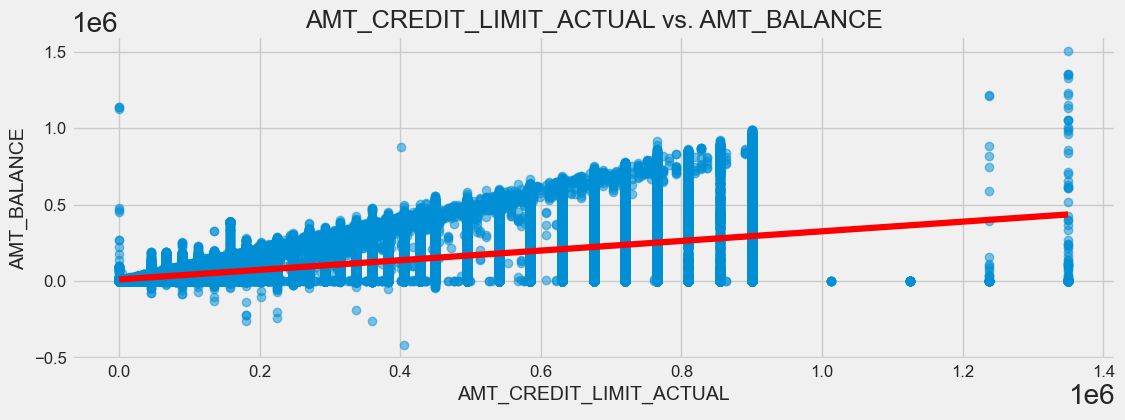

In [5]:
sns.regplot(x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_BALANCE', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('AMT_CREDIT_LIMIT_ACTUAL vs. AMT_BALANCE', fontsize=18)  # Menambah ukuran font judul
plt.xlabel('AMT_CREDIT_LIMIT_ACTUAL', fontsize=14)  # Menambah ukuran font label x
plt.ylabel('AMT_BALANCE', fontsize=14)  # Menambah ukuran font label y
plt.xticks(fontsize=12)  # Mengatur ukuran font tick labels pada sumbu x
plt.yticks(fontsize=12)  # Mengatur ukuran font tick labels pada sumbu y
plt.show()


### Business Insight Berdasarkan Gambar Distribusi `AMT_CREDIT_LIMIT_ACTUAL` vs `AMT_BALANCE`<br>

1. AMT_CREDIT_LIMIT_ACTUAL menunjukkan batas kredit yang diberikan kepada pelanggan. Distribusinya sangat skewed ke arah bawah, menunjukkan bahwa sebagian besar pelanggan memiliki batas kredit rendah, meskipun ada beberapa outliers dengan batas kredit sangat tinggi.
2. AMT_BALANCE menggambarkan saldo kredit yang tersisa atau total kredit yang masih dimiliki pelanggan. Sebagian besar pelanggan memiliki saldo kredit rendah, tetapi ada segelintir dengan saldo yang tinggi, mengindikasikan pemanfaatan kredit yang lebih besar.

Kesimpulan: Banyak pelanggan yang memiliki batas kredit rendah tidak menggunakan kredit mereka secara maksimal, terlihat dari saldo kredit yang juga rendah. Hal ini bisa berarti ada potensi untuk mendorong pelanggan agar menggunakan kredit lebih banyak. Sementara itu, pelanggan dengan batas kredit yang lebih tinggi juga cenderung memiliki saldo besar, menunjukkan bahwa mereka aktif menggunakan kredit.
Rekomendasi: Dorong pelanggan dengan batas kredit rendah untuk menggunakan kredit mereka lebih sering melalui program promosi cicilan tanpa bunga atau cashback pada pembelian tertentu.

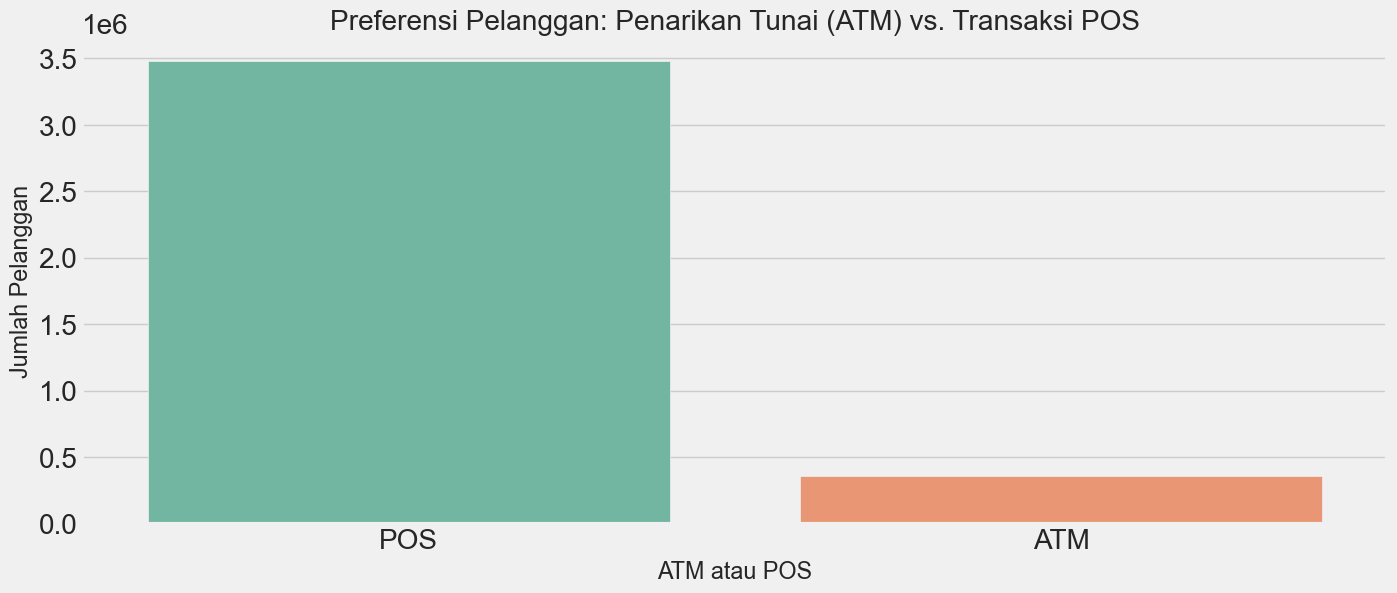

In [7]:
# Membuat kategori untuk analisis
data['ATM_or_POS'] = ['ATM' if x > y else 'POS' for x, y in zip(data['CNT_DRAWINGS_ATM_CURRENT'], data['CNT_DRAWINGS_POS_CURRENT'])]

plt.figure(figsize=(15, 6))
sns.countplot(x='ATM_or_POS', data=data, palette='Set2')
plt.title('Preferensi Pelanggan: Penarikan Tunai (ATM) vs. Transaksi POS')
plt.xlabel('ATM atau POS')
plt.ylabel('Jumlah Pelanggan')
plt.show()

### Business Insight Berdasarkan Grafik `CNT_DRAWINGS_ATM_CURRENT vs CNT_DRAWINGS_POS_CURRENT`

1. CNT_DRAWINGS_ATM_CURRENT mencatat jumlah penarikan tunai melalui ATM. Sebagian besar pelanggan melakukan penarikan dalam jumlah kecil atau tidak sama sekali.
2. CNT_DRAWINGS_POS_CURRENT mencatat jumlah transaksi yang dilakukan melalui point of sale (POS). Jumlah transaksinya juga rendah bagi kebanyakan pelanggan, meski ada segelintir yang aktif bertransaksi di POS.

Kesimpulan: Ada kecenderungan bahwa penarikan tunai melalui ATM lebih sering dilakukan oleh pelanggan daripada penggunaan kartu untuk transaksi di POS. Ini mungkin menunjukkan kebergantungan pada uang tunai dalam bertransaksi, meskipun ada sebagian kecil pelanggan yang aktif bertransaksi di POS.

Rekomendasi: Tingkatkan penggunaan transaksi non-tunai dengan program cashback atau poin reward untuk transaksi melalui POS. Ini dapat mengurangi kebergantungan pada penarikan tunai dan berpotensi mengurangi biaya pengelolaan uang tunai bagi perusahaan.

### Kesimpulan dari Ketiga Business Insight <br>

Berdasarkan analisis dari ketiga visualisasi, berikut adalah kesimpulan utama dan rekomendasi strategis yang dapat diambil:<br>

1. AMT_CREDIT_LIMIT_ACTUAL vs. AMT_BALANCE (Scatter Plot)

Kesimpulan: Ada hubungan yang terlihat antara batas kredit yang diberikan dan saldo yang masih terhutang oleh pelanggan. Pelanggan dengan batas kredit yang lebih tinggi cenderung memiliki saldo kredit yang lebih besar, namun beberapa pelanggan terlihat tetap menjaga saldo rendah meskipun memiliki kredit limit yang tinggi. Insight ini dapat memberikan sinyal kepada bisnis mengenai segmentasi pelanggan berdasarkan penggunaan kredit mereka. Misalnya, pelanggan dengan batas kredit tinggi tapi saldo rendah bisa menjadi target untuk penawaran produk kredit tambahan atau layanan premium.

2. CNT_DRAWINGS_ATM_CURRENT vs. CNT_DRAWINGS_POS_CURRENT (Stacked Bar Plot)

Kesimpulan: Preferensi pelanggan lebih cenderung ke arah penggunaan ATM dibandingkan POS, atau sebaliknya. Jika penarikan ATM lebih tinggi, ini bisa berarti pelanggan lebih memilih untuk bertransaksi secara tunai. Jika transaksi POS lebih tinggi, bisa jadi pelanggan lebih nyaman menggunakan pembayaran elektronik atau digital. Bisnis dapat memanfaatkan insight ini untuk mengembangkan strategi promosi yang relevan, misalnya memberikan cashback atau diskon lebih besar untuk transaksi POS untuk mendorong lebih banyak transaksi tanpa uang tunai, atau mengurangi biaya terkait penarikan ATM.
